## EDA 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Beauty Products

In [4]:
df1 = pd.read_csv("beauty_products.csv")
df1

,Product_Name,Original_Price,Offer_Percentage,Final_Price,Reviews,Tags,Sizes,Stock
0,O.P.I RapiDry Quick-Dry Nail Polish,MRP:₹550,12%,₹484,33.0,AD,25 shades,In Stock
1,Charlotte Tilbury Airbrush Flawless Foundation,MRP:₹5100,30%,₹3570,3921.0,BESTSELLER,8 shades,In Stock
2,M.A.C MACximal Matte Mini Lipstick,MRP:₹1650,30%,₹1150,33054.0,BESTSELLER,14 shades,In Stock
3,LANEIGE Lip Glowy Balm,₹750,NaN,₹750,21822.0,BESTSELLER,6 shades,In Stock
4,Too Faced Better Than Sex Liquid Eye Liner,₹2350,NaN,₹2350,959.0,AD,NaN,In Stock
...,...,...,...,...,...,...,...,...
1686,IDUN Minerals Eye & Lip Definer Brush,₹1300,NaN,₹1300,NaN,NaN,NaN,In Stock
1687,IDUN Minerals Concealer Brush,₹1300,NaN,₹1300,NaN,NaN,NaN,In Stock
1688,IDUN Minerals Eyeshadow Brush,₹1300,NaN,₹1300,NaN,NaN,NaN,In Stock
1689,IDUN Minerals Blending Brush,₹1300,NaN,₹1300,NaN,NaN,NaN,In Stock


In [5]:
df1["Original_Price"]=df1["Original_Price"].astype(str).str.replace("MRP:", "").str.replace("₹", "").str.strip()
df1["Final_Price"] = df1["Final_Price"].astype(str).str.replace("₹", "").str.strip()
df1["Sizes"] = df1["Sizes"].astype(str).str.replace("shades", "").str.strip()
df1["Offer_Percentage"] = df1["Offer_Percentage"].astype(str).str.replace("%", "").str.strip()
df1["Original_Price"] = pd.to_numeric(df1["Original_Price"], errors="coerce")
df1["Final_Price"] = pd.to_numeric(df1["Final_Price"], errors="coerce")
df1["Sizes"] = pd.to_numeric(df1["Sizes"], errors="coerce")
df1["Offer_Percentage"] = pd.to_numeric(df1["Offer_Percentage"], errors="coerce")
df1["Sizes"] = df1["Sizes"].fillna(1).astype(int)
df1["Reviews"] = df1["Reviews"].fillna(0).astype(int)
df1["Offer_Percentage"] = df1["Offer_Percentage"].fillna(0).astype(int)
df1["Tags"] = df1["Tags"].fillna("Unknown")

In [6]:
df1.drop(df1[df1["Final_Price"] == 0].index, inplace=True)

In [7]:
df1

,Product_Name,Original_Price,Offer_Percentage,Final_Price,Reviews,Tags,Sizes,Stock
0,O.P.I RapiDry Quick-Dry Nail Polish,550,12,484,33,AD,25,In Stock
1,Charlotte Tilbury Airbrush Flawless Foundation,5100,30,3570,3921,BESTSELLER,8,In Stock
2,M.A.C MACximal Matte Mini Lipstick,1650,30,1150,33054,BESTSELLER,14,In Stock
3,LANEIGE Lip Glowy Balm,750,0,750,21822,BESTSELLER,6,In Stock
4,Too Faced Better Than Sex Liquid Eye Liner,2350,0,2350,959,AD,1,In Stock
...,...,...,...,...,...,...,...,...
1686,IDUN Minerals Eye & Lip Definer Brush,1300,0,1300,0,Unknown,1,In Stock
1687,IDUN Minerals Concealer Brush,1300,0,1300,0,Unknown,1,In Stock
1688,IDUN Minerals Eyeshadow Brush,1300,0,1300,0,Unknown,1,In Stock
1689,IDUN Minerals Blending Brush,1300,0,1300,0,Unknown,1,In Stock


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Name      1691 non-null   object
 1   Original_Price    1691 non-null   int64 
 2   Offer_Percentage  1691 non-null   int64 
 3   Final_Price       1691 non-null   int64 
 4   Reviews           1691 non-null   int64 
 5   Tags              1691 non-null   object
 6   Sizes             1691 non-null   int64 
 7   Stock             1691 non-null   object
dtypes: int64(5), object(3)
memory usage: 105.8+ KB


In [8]:
df1.isna().sum()

Product_Name        0
Original_Price      0
Offer_Percentage    0
Final_Price         0
Reviews             0
Tags                0
Sizes               0
Stock               0
dtype: int64

## Baby Products

In [11]:
df2 = pd.read_csv("baby_products.csv")
df2

,Product_Name,Original_Price,Offer_Percentage,Final_Price,Reviews,Tags,Sizes,Stock
0,Orimii Bump Hydrating Body Butter for Reducing...,MRP:₹695,5%,₹660,77.0,"AD, BESTSELLER",NaN,In Stock
1,Bioderma Atoderm Creme Ultra-Nourising Moistur...,₹699,NaN,₹699,15435.0,BESTSELLER,NaN,In Stock
2,Max Care Virgin Coconut Oil Cold Pressed,₹325,NaN,₹325,22862.0,BESTSELLER,3 sizes,In Stock
3,Cetaphil Baby Daily Lotion With Shea Butter Vi...,MRP:₹950,7%,₹884,5142.0,BESTSELLER,NaN,In Stock
4,Nat Habit Baby Body Lotion - Almond Date,MRP:₹591,30%,₹414,17.0,AD,2 sizes,In Stock
...,...,...,...,...,...,...,...,...
723,Puddles Kids Unicorn Magic Organic Mist,₹499,NaN,₹499,NaN,NaN,NaN,Out Of Stock
724,Mylo Care Cold Pressed Extra Virgin Coconut Oi...,₹349,NaN,₹349,45.0,NaN,1 size,Out Of Stock
725,TuCo Intelligent Kids Tear-Free Kids Anti Dand...,MRP:₹900,46%,₹491,NaN,NaN,NaN,Out Of Stock
726,TIKITORO Teens Nourishing Bath Bar,₹310,NaN,₹310,1.0,NaN,NaN,Out Of Stock


In [13]:
df2["Original_Price"]=df2["Original_Price"].astype(str).str.replace("MRP:", "").str.replace("₹", "").str.strip()
df2["Final_Price"] = df2["Final_Price"].astype(str).str.replace("₹", "").str.strip()
df2["Sizes"] = df2["Sizes"].astype(str).str.replace("shades", "").str.strip()
df2["Offer_Percentage"] = df2["Offer_Percentage"].astype(str).str.replace("%", "").str.strip()
df2["Original_Price"] = pd.to_numeric(df2["Original_Price"], errors="coerce")
df2["Final_Price"] = pd.to_numeric(df2["Final_Price"], errors="coerce")
df2["Sizes"] = pd.to_numeric(df2["Sizes"], errors="coerce")
df2["Offer_Percentage"] = pd.to_numeric(df2["Offer_Percentage"], errors="coerce")
df2["Sizes"] = df2["Sizes"].fillna(1).astype(int)
df2["Reviews"] = df2["Reviews"].fillna(0).astype(int)
df2["Offer_Percentage"] = df2["Offer_Percentage"].fillna(0).astype(int)
df2["Tags"] = df2["Tags"].fillna("Unknown")

In [14]:
df2

,Product_Name,Original_Price,Offer_Percentage,Final_Price,Reviews,Tags,Sizes,Stock
0,Orimii Bump Hydrating Body Butter for Reducing...,695,5,660,77,"AD, BESTSELLER",1,In Stock
1,Bioderma Atoderm Creme Ultra-Nourising Moistur...,699,0,699,15435,BESTSELLER,1,In Stock
2,Max Care Virgin Coconut Oil Cold Pressed,325,0,325,22862,BESTSELLER,1,In Stock
3,Cetaphil Baby Daily Lotion With Shea Butter Vi...,950,7,884,5142,BESTSELLER,1,In Stock
4,Nat Habit Baby Body Lotion - Almond Date,591,30,414,17,AD,1,In Stock
...,...,...,...,...,...,...,...,...
723,Puddles Kids Unicorn Magic Organic Mist,499,0,499,0,Unknown,1,Out Of Stock
724,Mylo Care Cold Pressed Extra Virgin Coconut Oi...,349,0,349,45,Unknown,1,Out Of Stock
725,TuCo Intelligent Kids Tear-Free Kids Anti Dand...,900,46,491,0,Unknown,1,Out Of Stock
726,TIKITORO Teens Nourishing Bath Bar,310,0,310,1,Unknown,1,Out Of Stock


## Health Products

In [15]:
df3 = pd.read_csv("health_products.csv")
df3

,Product_Name,Original_Price,Offer_Percentage,Final_Price,Reviews,Tags,Sizes,Stock
0,"Wellbeing Nutrition Whey Protein Isolate, 31g ...",MRP:₹4999,5%,₹4749,NaN,"AD, BESTSELLER",NaN,In Stock
1,Optimum Nutrition (ON) Gold Standard 100% Whey...,MRP:₹9299,20%,₹7399,881.0,BESTSELLER,5 sizes,In Stock
2,"OZiva Protein & Herbs Women(with Shatavari, Gi...",MRP:₹1699,6%,₹1599,494.0,BESTSELLER,2 sizes,In Stock
3,Isopure Low Carb Whey Protein Isolate Powder -...,MRP:₹5949,20%,₹4749,114.0,BESTSELLER,2 sizes,In Stock
4,Wellbeing Nutrition Organic Vegan Protein Isol...,MRP:₹1999,5%,₹1899,2.0,"AD, BESTSELLER",NaN,In Stock
...,...,...,...,...,...,...,...,...
1055,Nutrabay Gold Isolate Whey Protein Powder - Do...,MRP:₹7899,29%,₹5608,NaN,NaN,NaN,Out Of Stock
1056,MYPRO SPORT NUTRITION Premium BCAA'S With 5G O...,₹1399,NaN,₹1399,NaN,NaN,NaN,Out Of Stock
1057,"HealthyHey Sports BCAA Powder 2:1:1, Branched ...",MRP:₹1699,44%,₹949,2.0,NaN,NaN,Out Of Stock
1058,MYPRO SPORT NUTRITION Premium BCAA'S With 5G O...,₹1399,NaN,₹1399,1.0,NaN,NaN,Out Of Stock


In [16]:
df3["Original_Price"]=df3["Original_Price"].astype(str).str.replace("MRP:", "").str.replace("₹", "").str.strip()
df3["Final_Price"] = df3["Final_Price"].astype(str).str.replace("₹", "").str.strip()
df3["Sizes"] = df3["Sizes"].astype(str).str.replace("shades", "").str.strip()
df3["Offer_Percentage"] = df3["Offer_Percentage"].astype(str).str.replace("%", "").str.strip()
df3["Original_Price"] = pd.to_numeric(df3["Original_Price"], errors="coerce")
df3["Final_Price"] = pd.to_numeric(df3["Final_Price"], errors="coerce")
df3["Sizes"] = pd.to_numeric(df3["Sizes"], errors="coerce")
df3["Offer_Percentage"] = pd.to_numeric(df3["Offer_Percentage"], errors="coerce")
df3["Sizes"] = df3["Sizes"].fillna(1).astype(int)
df3["Reviews"] = df3["Reviews"].fillna(0).astype(int)
df3["Offer_Percentage"] = df3["Offer_Percentage"].fillna(0).astype(int)
df3["Tags"] = df3["Tags"].fillna("Unknown")

In [17]:
df3

,Product_Name,Original_Price,Offer_Percentage,Final_Price,Reviews,Tags,Sizes,Stock
0,"Wellbeing Nutrition Whey Protein Isolate, 31g ...",4999,5,4749,0,"AD, BESTSELLER",1,In Stock
1,Optimum Nutrition (ON) Gold Standard 100% Whey...,9299,20,7399,881,BESTSELLER,1,In Stock
2,"OZiva Protein & Herbs Women(with Shatavari, Gi...",1699,6,1599,494,BESTSELLER,1,In Stock
3,Isopure Low Carb Whey Protein Isolate Powder -...,5949,20,4749,114,BESTSELLER,1,In Stock
4,Wellbeing Nutrition Organic Vegan Protein Isol...,1999,5,1899,2,"AD, BESTSELLER",1,In Stock
...,...,...,...,...,...,...,...,...
1055,Nutrabay Gold Isolate Whey Protein Powder - Do...,7899,29,5608,0,Unknown,1,Out Of Stock
1056,MYPRO SPORT NUTRITION Premium BCAA'S With 5G O...,1399,0,1399,0,Unknown,1,Out Of Stock
1057,"HealthyHey Sports BCAA Powder 2:1:1, Branched ...",1699,44,949,2,Unknown,1,Out Of Stock
1058,MYPRO SPORT NUTRITION Premium BCAA'S With 5G O...,1399,0,1399,1,Unknown,1,Out Of Stock


## Analysis 

In [24]:
print("Average Discount (%):", df1["Offer_Percentage"].mean())
print("Average Price:", df1["Final_Price"].mean())
print("Max Price:", df1["Final_Price"].max())
print("Min Price:", df1["Final_Price"].min())

Average Discount (%): 4.670414201183432
Average Price: 3095.56449704142
Max Price: 25900
Min Price: 399


In [26]:
def summary_stats(df, category):
    print(f"\n--- {category} Products: Summary Stats ---")
    print("Total Products:", len(df))
    print("Average Discount (%):", df["Offer_Percentage"].mean())
    print("Average Price:", df["Final_Price"].mean())
    print("Max Price:", df["Final_Price"].max())
    print("Min Price:", df["Final_Price"].min())

summary_stats(df1, "Beauty")
summary_stats(df2, "Baby")
summary_stats(df3, "Healthcare")


--- Beauty Products: Summary Stats ---
Total Products: 1690
Average Discount (%): 4.670414201183432
Average Price: 3095.56449704142
Max Price: 25900
Min Price: 399

--- Baby Products: Summary Stats ---
Total Products: 728
Average Discount (%): 11.211538461538462
Average Price: 612.2239010989011
Max Price: 4249
Min Price: 28

--- Healthcare Products: Summary Stats ---
Total Products: 1060
Average Discount (%): 25.370754716981132
Average Price: 1992.9650943396227
Max Price: 16299
Min Price: 170


### Top 5 Products by Reviews
#### Helps identify which products customers love

In [28]:
def top_rated_products(df, category):
    print(f"\n--- {category} Products: Top Rated ---")
    print(df.nlargest(5, "Reviews")[["Product_Name", "Reviews", "Final_Price"]])

top_rated_products(df1, "Beauty")
top_rated_products(df2, "Baby")
top_rated_products(df3, "Healthcare")


--- Beauty Products: Top Rated ---
                                         Product_Name  Reviews  Final_Price
2                  M.A.C MACximal Matte Mini Lipstick    33054         1150
1614                            M.A.C Lipstick / Mini    29895         1100
3                              LANEIGE Lip Glowy Balm    21822          750
7     M.A.C Studio Fix Powder Plus Compact Foundation    19091         3400
93              M.A.C Prep + Prime Fix+ Setting Spray    17588         2700

--- Baby Products: Top Rated ---
                                          Product_Name  Reviews  Final_Price
30   Cetaphil Gentle Skin Cleanser & Sun SPF 50 Lig...   138555         1482
158  Cetaphil Gentle Skin Cleanser & Sun SPF 30 Lig...   130090         1603
2             Max Care Virgin Coconut Oil Cold Pressed    22862          325
1    Bioderma Atoderm Creme Ultra-Nourising Moistur...    15435          699
353  Dove Deep Moisture Body Wash + Baby Dove Rich ...    12572          664

--- Healthc

### Lowest 5 Products by Reviews

In [29]:
def low_rated_products(df, category):
    print(f"\n--- {category} Products: Lowest Rated ---")
    print(df.nsmallest(5, "Reviews")[["Product_Name", "Reviews", "Final_Price"]])
    
low_rated_products(df1, "Beauty")
low_rated_products(df2, "Baby")
low_rated_products(df3, "Healthcare")


--- Beauty Products: Lowest Rated ---
                                          Product_Name  Reviews  Final_Price
158         Jeffree Star Cosmetics Shiny Trap Lipstick        0         2633
277  Estee Lauder Double Wear Stay-In-Place Flawles...        0         3200
282  Charlotte Tilbury Super Nudes Lip Cheat Contou...        0         2700
344  Benefit Cosmetics The Porefessional Foundation...        0         4650
360  IT COSMETICS Bye Bye Dark Spots Concealer + Serum        0         3100

--- Baby Products: Lowest Rated ---
                                          Product_Name  Reviews  Final_Price
84                  Purexa Kids Toothbrush (Pack of 2)        0          188
88                          Dermavive Nappy Rash Cream        0          950
189  BABY FOREST Neer 99.9% Water Baby Wipes - Pack...        0         1099
202                    Chicco Baby Moments Body Lotion        0          639
212  TuCo Intelligent Kids Oat Bathing Bar - Soap-F...        0          300


### Discount Analysis

In [31]:
def discount_analysis(df, category):
    discount_values = df["Offer_Percentage"]
    print(f"\n--- {category} Products: Discount Analysis ---")
    print("Average Discount:", discount_values.mean())
    print("Max Discount:", discount_values.max())
    print("Min Discount:", discount_values.min())
    
discount_analysis(df1, "Beauty")
discount_analysis(df2, "Baby")
discount_analysis(df3, "Healthcare")


--- Beauty Products: Discount Analysis ---
Average Discount: 4.670414201183432
Max Discount: 50
Min Discount: 0

--- Baby Products: Discount Analysis ---
Average Discount: 11.211538461538462
Max Discount: 69
Min Discount: 0

--- Healthcare Products: Discount Analysis ---
Average Discount: 25.370754716981132
Max Discount: 71
Min Discount: 0


## Pricing & Discount Strategy

In [3]:
df1.to_csv("beauty_products_clean.csv", index=False)

NameError: name 'df1' is not defined

In [34]:
df2.to_csv("baby_products_clean.csv", index=False)

In [35]:
df3.to_csv("health_products_clean.csv", index=False)

In [18]:
# Load your 3 cleaned datasets
health_df = pd.read_csv("health_products_clean.csv")
baby_df   = pd.read_csv("baby_products_clean.csv")
beauty_df = pd.read_csv("beauty_products_clean.csv")

In [19]:
# Add category column to distinguish
health_df["Category"] = "Health"
baby_df["Category"]   = "Baby"
beauty_df["Category"] = "Beauty"

In [20]:
# Combine all into one DataFrame
df = pd.concat([health_df, baby_df, beauty_df], ignore_index=True)

In [21]:
df

,Product_Name,Original_Price,Offer_Percentage,Final_Price,Reviews,Tags,Sizes,Stock,Category
0,"Wellbeing Nutrition Whey Protein Isolate, 31g ...",4999,5,4749,0,"AD, BESTSELLER",1,In Stock,Health
1,Optimum Nutrition (ON) Gold Standard 100% Whey...,9299,20,7399,881,BESTSELLER,1,In Stock,Health
2,"OZiva Protein & Herbs Women(with Shatavari, Gi...",1699,6,1599,494,BESTSELLER,1,In Stock,Health
3,Isopure Low Carb Whey Protein Isolate Powder -...,5949,20,4749,114,BESTSELLER,1,In Stock,Health
4,Wellbeing Nutrition Organic Vegan Protein Isol...,1999,5,1899,2,"AD, BESTSELLER",1,In Stock,Health
...,...,...,...,...,...,...,...,...,...
3473,IDUN Minerals Eye & Lip Definer Brush,1300,0,1300,0,Unknown,1,In Stock,Beauty
3474,IDUN Minerals Concealer Brush,1300,0,1300,0,Unknown,1,In Stock,Beauty
3475,IDUN Minerals Eyeshadow Brush,1300,0,1300,0,Unknown,1,In Stock,Beauty
3476,IDUN Minerals Blending Brush,1300,0,1300,0,Unknown,1,In Stock,Beauty


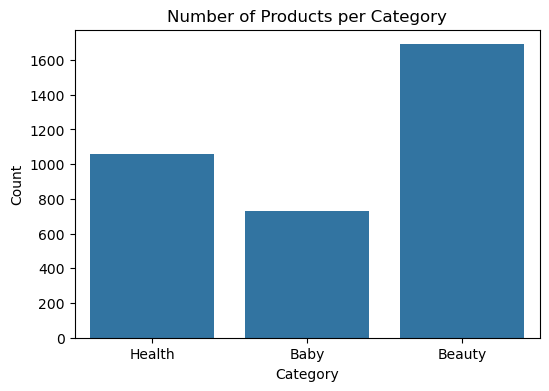

In [10]:
# 1. Distribution of Products by Category
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Category")
plt.title("Number of Products per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [29]:
# 1. Average, Min, Max Price per Category
price_summary = df.groupby("Category")[["Original_Price", "Final_Price"]].agg(["mean","min","max"])

In [30]:
price_summary

Original_Price              Final_Price            
                   mean  min    max         mean  min    max
Category                                                    
Baby         705.829670   30   5388   612.223901   28   4249
Beauty      3242.465089  399  25900  3095.564497  399  25900
Health      2703.752830  170  19999  1992.965094  170  16299

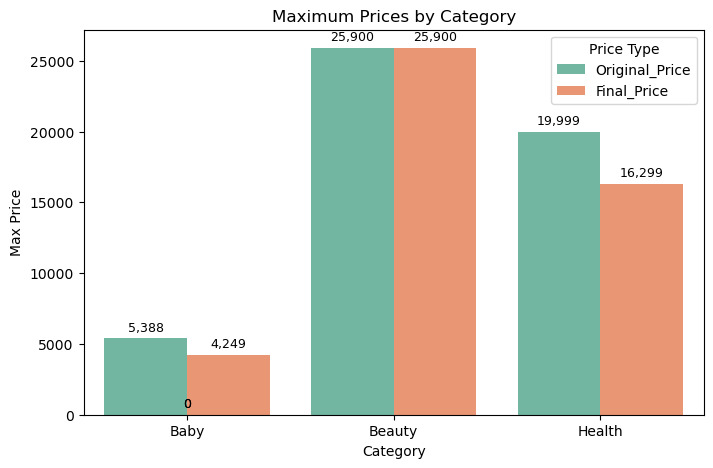

In [34]:
max_prices = df.groupby("Category")[["Original_Price", "Final_Price"]].max().reset_index()

# Melt for grouped bar plotting
max_prices_melted = max_prices.melt(
    id_vars="Category", 
    value_vars=["Original_Price", "Final_Price"], 
    var_name="Price_Type", value_name="Max_Price"
)

plt.figure(figsize=(8,5))
ax = sns.barplot(data=max_prices_melted, x="Category", y="Max_Price", hue="Price_Type", palette="Set2")

# Add values above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3), 
                textcoords='offset points')

plt.title("Maximum Prices by Category")
plt.ylabel("Max Price")
plt.xlabel("Category")
plt.legend(title="Price Type")
plt.show()

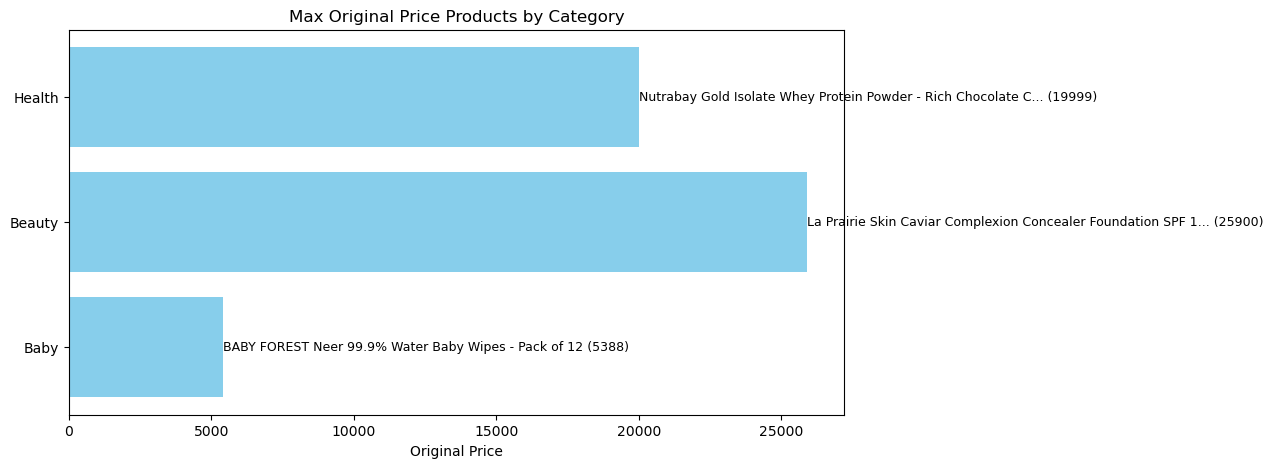

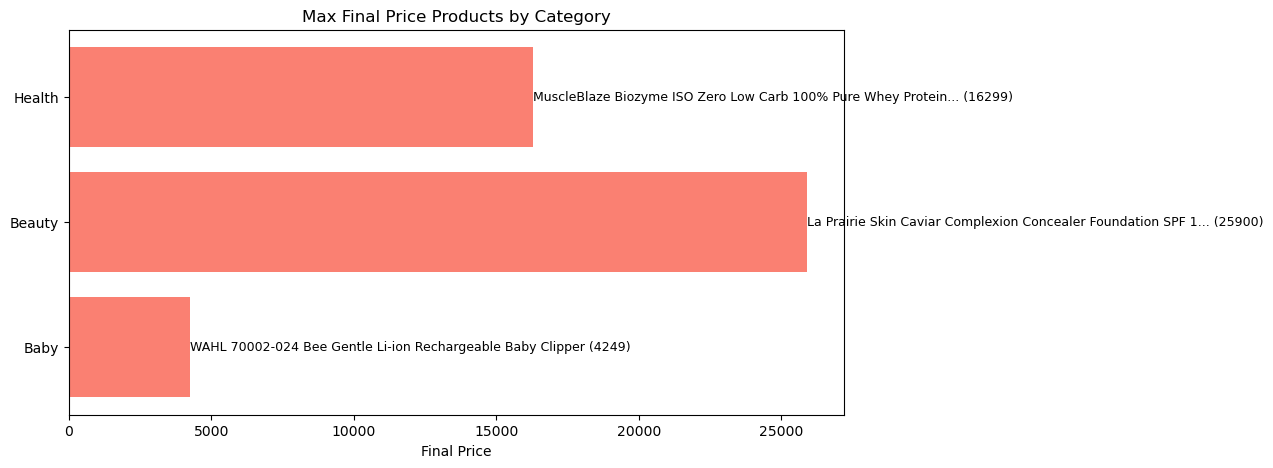

In [42]:
import matplotlib.pyplot as plt

# Get max price products per category
max_products_original = df.loc[df.groupby("Category")["Original_Price"].idxmax(), ["Category", "Product_Name", "Original_Price"]]
max_products_final = df.loc[df.groupby("Category")["Final_Price"].idxmax(), ["Category", "Product_Name", "Final_Price"]]

# Plot for Original Price
plt.figure(figsize=(10,5))
plt.barh(max_products_original["Category"], max_products_original["Original_Price"], color="skyblue")
for i, (val, name) in enumerate(zip(max_products_original["Original_Price"], max_products_original["Product_Name"])):
    plt.text(val, i, f"{name} ({val})", va="center", ha="left", fontsize=9)
plt.title("Max Original Price Products by Category")
plt.xlabel("Original Price")
plt.show()

# Plot for Final Price
plt.figure(figsize=(10,5))
plt.barh(max_products_final["Category"], max_products_final["Final_Price"], color="salmon")
for i, (val, name) in enumerate(zip(max_products_final["Final_Price"], max_products_final["Product_Name"])):
    plt.text(val, i, f"{name} ({val})", va="center", ha="left", fontsize=9)
plt.title("Max Final Price Products by Category")
plt.xlabel("Final Price")
plt.show()


In [44]:
# 2. Average Discount per Category
discount_summary = df.groupby("Category")["Offer_Percentage"].agg(["mean","min","max"])

In [46]:
discount_summary

,mean,min,max
Category,,,
Baby,11.211538,0,69
Beauty,4.670414,0,50
Health,25.370755,0,71


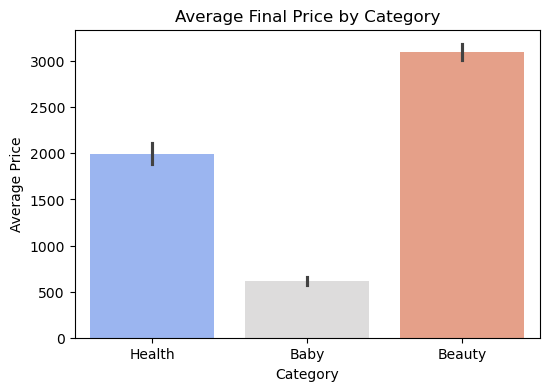

In [14]:
# 2. Average Price by Category
plt.figure(figsize=(6,4))
sns.barplot(
    data=df, 
    x="Category", 
    y="Final_Price", 
    hue="Category",     
    palette="coolwarm", 
    estimator="mean", 
    legend=False         
)
plt.title("Average Final Price by Category")
plt.ylabel("Average Price")
plt.show()

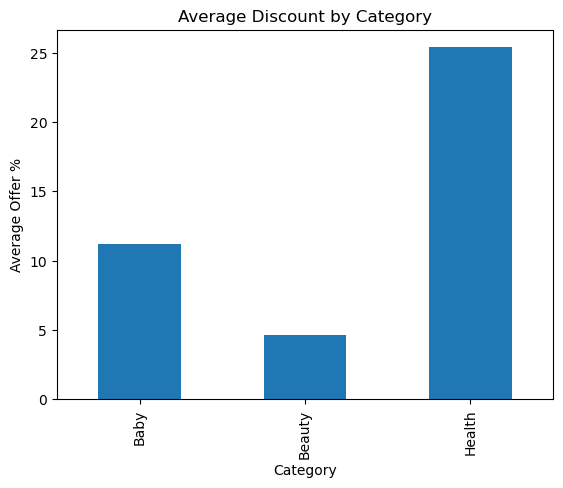

In [50]:
# Avg discount per category
discount_summary["mean"].plot(kind="bar", title="Average Discount by Category")
plt.ylabel("Average Offer %")
plt.show()

In [47]:
# 3. Relationship between Discount & Final Price
discount_vs_price = df.groupby("Offer_Percentage")["Final_Price"].mean()

This helps understand whether higher discounts are applied to higher-priced items or lower-priced items.

Products with 0% discount have avg price around X

In [48]:
discount_vs_price

Offer_Percentage
0     2707.545067
1     2574.000000
2     2503.333333
3     2432.333333
4     1285.090909
         ...     
65     438.714286
67     751.000000
68     319.000000
69     204.500000
71     289.000000
Name: Final_Price, Length: 70, dtype: float64

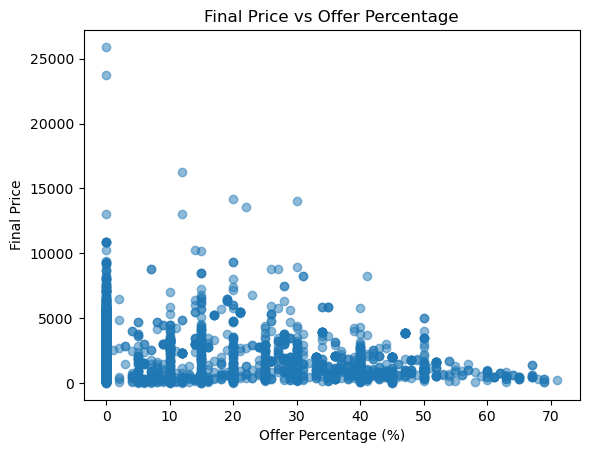

In [51]:
plt.scatter(df["Offer_Percentage"], df["Final_Price"], alpha=0.5)
plt.title("Final Price vs Offer Percentage")
plt.xlabel("Offer Percentage (%)")
plt.ylabel("Final Price")
plt.show()

### Customer Engagement Analysis

Top 10 Reviewed Products per Category

In [54]:
top10_reviews = (
    df.groupby("Category")
      .apply(lambda x: x.nlargest(10, "Reviews")[["Product_Name", "Reviews", "Final_Price", "Offer_Percentage"]])
      .reset_index(drop=True)
)
print(top10_reviews)

                                         Product_Name  Reviews  Final_Price  \
0   Cetaphil Gentle Skin Cleanser & Sun SPF 50 Lig...   138555         1482   
1   Cetaphil Gentle Skin Cleanser & Sun SPF 30 Lig...   130090         1603   
2            Max Care Virgin Coconut Oil Cold Pressed    22862          325   
3   Bioderma Atoderm Creme Ultra-Nourising Moistur...    15435          699   
4   Dove Deep Moisture Body Wash + Baby Dove Rich ...    12572          664   
5                 Johnson's Everyday Essentials Combo     9631          312   
6   Mamaearth Milky Soft Face Cream for Babies wit...     7823          189   
7                                 Himalaya Baby Cream     7133          310   
8   Mamaearth Mineral Based Sunscreen For Babies S...     6270          150   
9   Mamaearth Mineral Based Sunscreen For Babies S...     6270          150   
10                 M.A.C MACximal Matte Mini Lipstick    33054         1150   
11                              M.A.C Lipstick / Min

C:\Users\Sai\AppData\Local\Temp\ipykernel_21692\4155166709.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, "Reviews")[["Product_Name", "Reviews", "Final_Price", "Offer_Percentage"]])


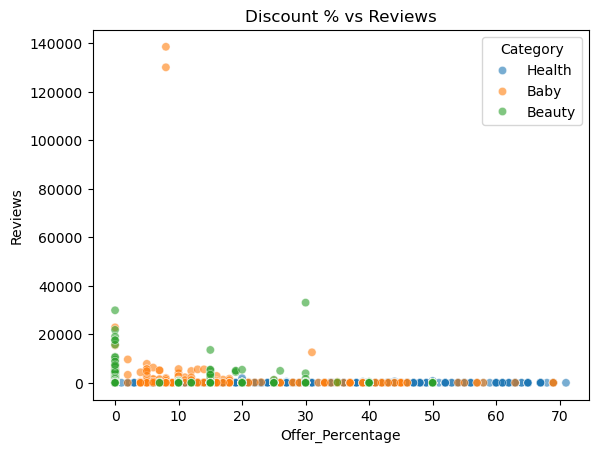

                  Offer_Percentage  Reviews
Offer_Percentage           1.00000 -0.03657
Reviews                   -0.03657  1.00000


In [55]:
import seaborn as sns

# Scatterplot: Discount vs Reviews
sns.scatterplot(x="Offer_Percentage", y="Reviews", hue="Category", data=df, alpha=0.6)
plt.title("Discount % vs Reviews")
plt.show()

# Correlation check
print(df[["Offer_Percentage", "Reviews"]].corr())

### Stock & Inventory Management

#### 1. % of In Stock vs Out Of Stock per Category

In [56]:
stock_status = (
    df.groupby(["Category", "Stock"])
      .size()
      .unstack(fill_value=0)
)

# Convert to percentage
stock_percentage = stock_status.div(stock_status.sum(axis=1), axis=0) * 100
print(stock_percentage)

Stock      In Stock  Out Of Stock
Category                         
Baby      92.307692      7.692308
Beauty    93.846154      6.153846
Health    88.679245     11.320755


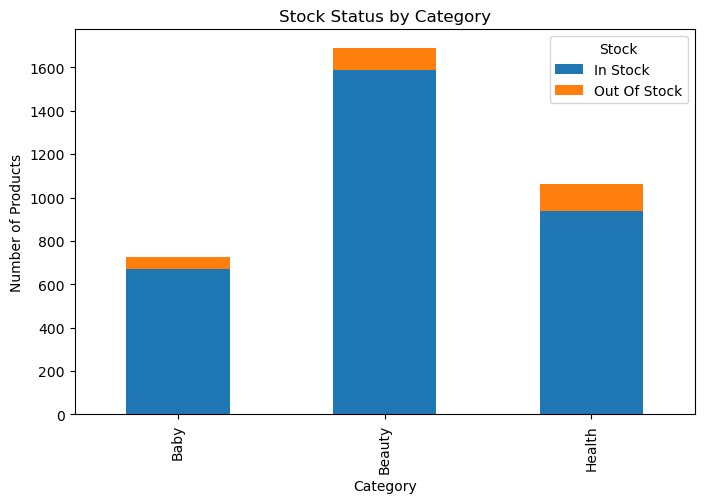

In [68]:
import matplotlib.pyplot as plt

stock_status.plot(kind="bar", stacked=True ,figsize=(8,5))
plt.title("Stock Status by Category")
plt.ylabel("Number of Products")
plt.show()

### Stock Status by Category

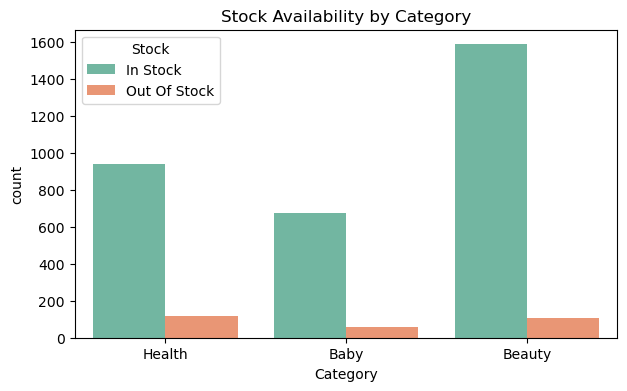

In [15]:
# 5. Stock Status by Category
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="Category", hue="Stock", palette="Set2")
plt.title("Stock Availability by Category")
plt.show()

#### 2. Which Products Go Out of Stock Often (High Demand)?

These are popular products (high reviews) that frequently go out of stock → signals high demand.

In [62]:
# Filter products marked Out Of Stock with high reviews
high_demand = df[(df["Stock"] == "Out Of Stock") & (df["Reviews"] > 500)]
print(high_demand[["Product_Name", "Reviews", "Final_Price"]])

                                           Product_Name  Reviews  Final_Price
1734                                Little's Baby Wipes     2929           49
1742  Sebamed Baby Shampoo, PH 5.5, Camomile, Natura...      569         1020
1748             Sebamed Baby Rash Cream & Powder Combo     1099         1310
1750  Sebamed Baby Lip Balm, For Dry & Sensitive Bab...      725          422
3346      Huda Beauty Eyeshadow Palette - Pretty Grunge      545         5900
3349  Smashbox Photo Finish Foundation Primer Pore M...      894         1450
3371                       Too Faced Damn Girl! Mascara     1150         2450
3378               M.A.C Studio Finish SPF 35 Concealer     1700         2450
3401                              M.A.C Lipstick / Mini    29895         1100
3412                         M.A.C Retro Matte Lipstick     7294         1750
3416                M.A.C Mineralize Skinfinish Natural      792         3200
3438                             M.A.C Love Me Lipstick      777

##### Top 10 Frequently Out-of-Stock Products
products that customers want but cannot buy right now

In [25]:
# Top 10 out-of-stock products with highest reviews
top10_out_of_stock = (
    df[df["Stock"] == "Out Of Stock"]
    .sort_values(by="Reviews", ascending=False)
    .head(10)
    [["Product_Name", "Category", "Reviews"]]
)

print(top10_out_of_stock)

                                           Product_Name Category  Reviews
3401                              M.A.C Lipstick / Mini   Beauty    29895
3412                         M.A.C Retro Matte Lipstick   Beauty     7294
1734                                Little's Baby Wipes     Baby     2929
3378               M.A.C Studio Finish SPF 35 Concealer   Beauty     1700
3371                       Too Faced Damn Girl! Mascara   Beauty     1150
1748             Sebamed Baby Rash Cream & Powder Combo     Baby     1099
3349  Smashbox Photo Finish Foundation Primer Pore M...   Beauty      894
3416                M.A.C Mineralize Skinfinish Natural   Beauty      792
3438                             M.A.C Love Me Lipstick   Beauty      777
1750  Sebamed Baby Lip Balm, For Dry & Sensitive Bab...     Baby      725


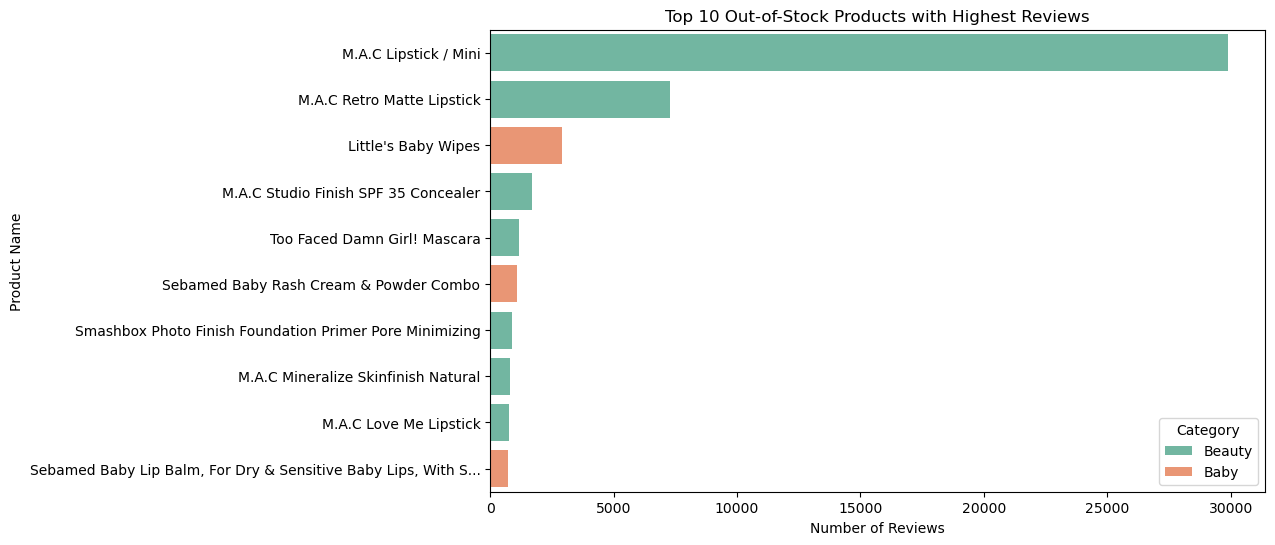

In [26]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=top10_out_of_stock,
    x="Reviews",
    y="Product_Name",
    hue="Category",     
    dodge=False,        
    palette="Set2"
)

plt.title("Top 10 Out-of-Stock Products with Highest Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.legend(title="Category")
plt.show()

In [27]:
# Top 10 in-stock products with highest reviews
top10_in_stock = (
    df[df["Stock"] == "In Stock"]
    .sort_values(by="Reviews", ascending=False)
    .head(10)
    [["Product_Name", "Category", "Reviews"]]
)

print(top10_in_stock)

                                           Product_Name Category  Reviews
1090  Cetaphil Gentle Skin Cleanser & Sun SPF 50 Lig...     Baby   138555
1218  Cetaphil Gentle Skin Cleanser & Sun SPF 30 Lig...     Baby   130090
1790                 M.A.C MACximal Matte Mini Lipstick   Beauty    33054
1062           Max Care Virgin Coconut Oil Cold Pressed     Baby    22862
1791                             LANEIGE Lip Glowy Balm   Beauty    21822
1795    M.A.C Studio Fix Powder Plus Compact Foundation   Beauty    19091
1881              M.A.C Prep + Prime Fix+ Setting Spray   Beauty    17588
1810                        M.A.C Studio Fix Fluid Mini   Beauty    17581
1813  M.A.C Strobe Cream Mini - Pinklite Illuminatin...   Beauty    15704
1061  Bioderma Atoderm Creme Ultra-Nourising Moistur...     Baby    15435


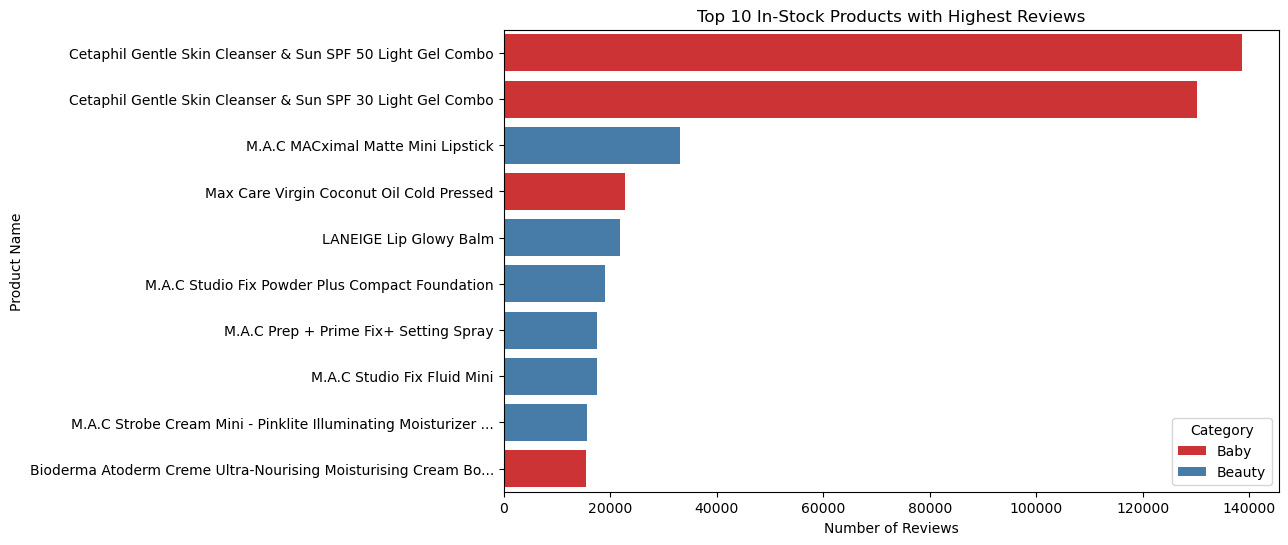

In [28]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=top10_in_stock,
    x="Reviews",
    y="Product_Name",
    hue="Category",     # color by category
    dodge=False,
    palette="Set1"
)

plt.title("Top 10 In-Stock Products with Highest Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.legend(title="Category")
plt.show()

#### 3. Which Products Remain In Stock but Have Low/No Reviews (Low Demand)?
   
   These are available but customers aren’t engaging

In [64]:
# Filter products In Stock but with low engagement
low_demand = df[(df["Stock"] == "In Stock") & (df["Reviews"] <= 5)]
print(low_demand[["Product_Name", "Reviews", "Final_Price"]])

                                           Product_Name  Reviews  Final_Price
0     Wellbeing Nutrition Whey Protein Isolate, 31g ...        0         4749
4     Wellbeing Nutrition Organic Vegan Protein Isol...        2         1899
8     Wellbeing Nutrition Whey Protein Isolate, 26g ...        2         4749
12          Oziva Clean Whey Concentrate Protein Powder        2         2299
20            Fast&Up Plant Protein Isolate - Chocolate        4         2554
...                                                 ...      ...          ...
3473              IDUN Minerals Eye & Lip Definer Brush        0         1300
3474                      IDUN Minerals Concealer Brush        0         1300
3475                      IDUN Minerals Eyeshadow Brush        0         1300
3476                       IDUN Minerals Blending Brush        0         1300
3477                   IDUN Minerals Face Definer Brush        1          800

[1596 rows x 3 columns]


### Top 10 Most Reviewed Products

C:\Users\Sai\AppData\Local\Temp\ipykernel_17456\2129831466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reviewed, x="Reviews", y="Product_Name", palette="mako")


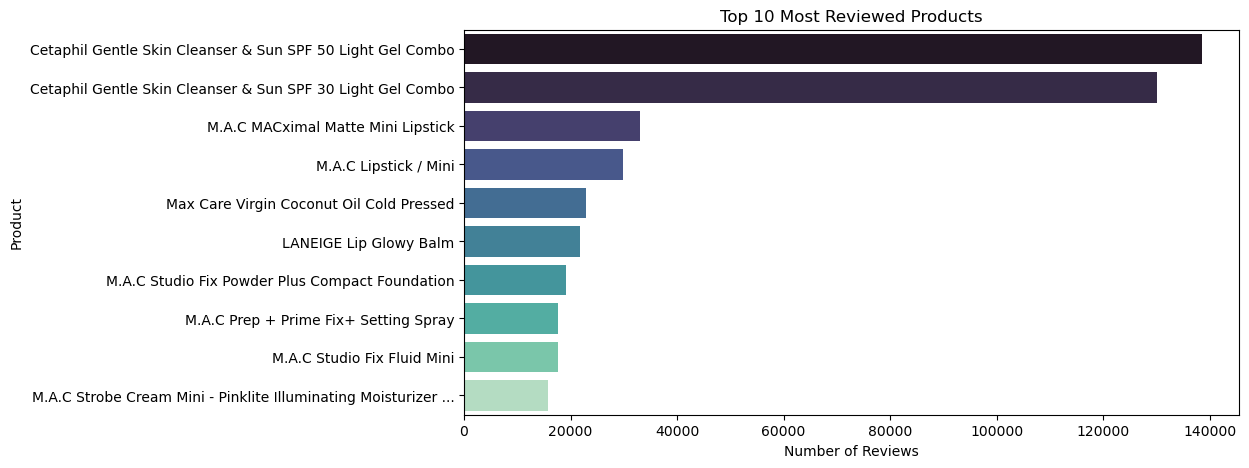

In [16]:
# 6. Top 10 Most Reviewed Products
top_reviewed = df.sort_values(by="Reviews", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_reviewed, x="Reviews", y="Product_Name", palette="mako")
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Number of Reviews")
plt.ylabel("Product")
plt.show()

### Exclude "Unknown" from Tags

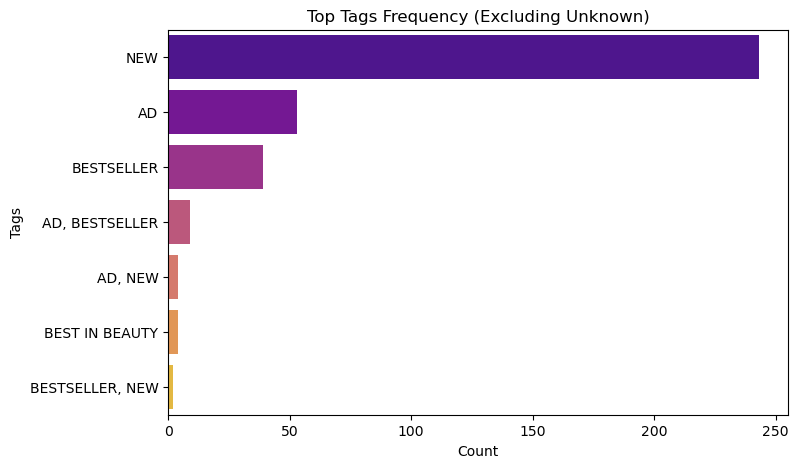

In [22]:
plt.figure(figsize=(8,5))

# Exclude "Unknown" from Tags
tag_counts = df[df["Tags"] != "Unknown"]["Tags"].value_counts().head(10).reset_index()
tag_counts.columns = ["Tag", "Count"]

sns.barplot(
    data=tag_counts,
    x="Count",
    y="Tag",
    hue="Tag",           
    palette="plasma",
    legend=False        
)
plt.title("Top Tags Frequency (Excluding Unknown)")
plt.xlabel("Count")
plt.ylabel("Tags")
plt.show()

In [23]:
tag_counts

,Tag,Count
0,NEW,243
1,AD,53
2,BESTSELLER,39
3,"AD, BESTSELLER",9
4,"AD, NEW",4
5,BEST IN BEAUTY,4
6,"BESTSELLER, NEW",2


### Final Price distribution by Category
To see which category has higher/lower spread of prices.

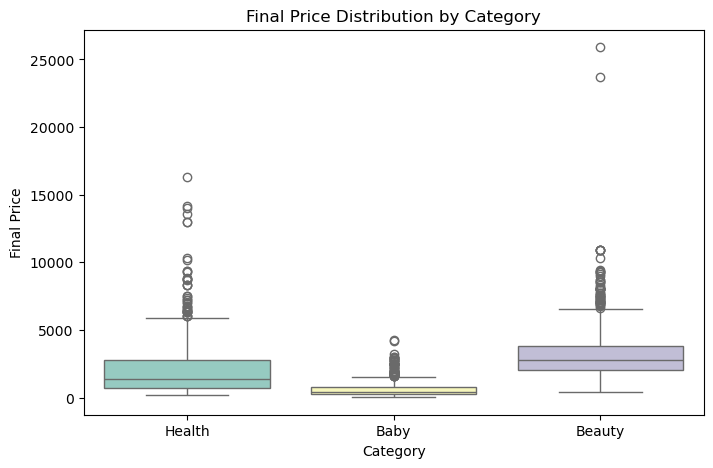

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Category", y="Final_Price", hue="Category", palette="Set3", legend=False)
plt.title("Final Price Distribution by Category")
plt.ylabel("Final Price")
plt.show()

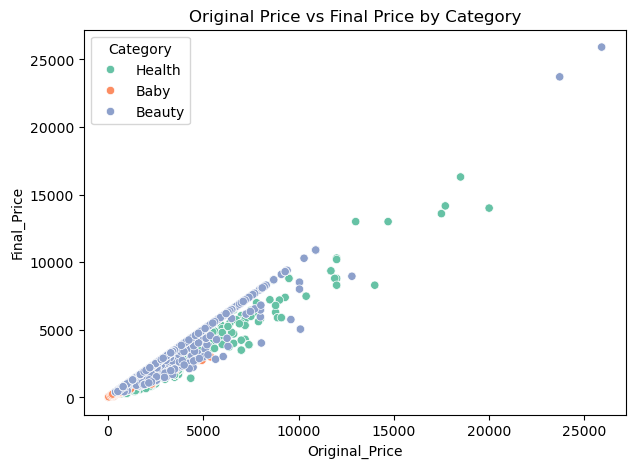

In [22]:
# 1. Original Price vs Final Price
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Original_Price", y="Final_Price", hue="Category", palette="Set2")
plt.title("Original Price vs Final Price by Category")
plt.show()